<a href="https://colab.research.google.com/github/mondragonsi/data_science/blob/main/Politicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [3]:
import os
import tarfile
import urllib.request



Load CSV from the VM sample_data folder. CSV can be found at: https://www.camara.leg.br/cotas/Ano-2022.csv.zip

In [11]:
import pandas as pd
HOUSING_PATH = os.path.join("sample_data")

def load_politicos_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "politicos22.csv")
    return pd.read_csv(csv_path,delimiter=";")

Looking at the data to check everything is good


In [12]:
politicos = load_politicos_data()
politicos.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2022,0,NaN,NaN,1833951,NaN,NaN,3453,7342370,https://www.camara.leg.br/cota-parlamentar/doc...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1822148,NaN,NaN,2713,7317427,https://www.camara.leg.br/cota-parlamentar/doc...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1825721,NaN,NaN,2713,7324813,https://www.camara.leg.br/cota-parlamentar/doc...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1824104,NaN,NaN,2713,7321395,https://www.camara.leg.br/cota-parlamentar/not...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2022,0,NaN,NaN,1826660,NaN,NaN,2713,7326637,https://www.camara.leg.br/cota-parlamentar/not...


Checking who has more spends 

In [13]:
politicos["txNomeParlamentar"].value_counts()

Patrus Ananias                1031
Subtenente Gonzaga             903
Jorge Solla                    881
Bohn Gass                      817
Maria do Rosário               797
                              ... 
LIDERANÇA DO PSL                 2
Aníbal Gomes                     2
LIDERANÇA DO SOLIDARIEDADE       1
Patricia Ferraz                  1
LIDERANÇA DO CIDADANIA           1
Name: txNomeParlamentar, Length: 571, dtype: int64

Checking the distribution of the data

In [14]:
politicos.describe()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,1.469160e+05,146916.000000,146916.000000,147365.0,147365.0,147365.000000,147365.000000,147365.000000,147365.000000,147365.000000,147365.000000,147365.000000,147365.0,147365.000000,1.473650e+05,45693.0,32.000000,147365.000000,1.473650e+05
mean,3.148133e+10,166268.884853,303.745038,2019.0,56.0,251.289682,0.274672,1.118576,951.208009,5.567811,944.945937,4.527988,2022.0,0.000054,1.277742e+06,0.0,1089.777500,2738.395548,5.191581e+06
std,2.853851e+10,46431.413405,161.412003,0.0,0.0,411.735112,0.465374,1.626375,2209.136788,109.419987,2201.492108,2.146816,0.0,0.007368,8.566972e+05,0.0,3505.499373,777.602208,3.282407e+06
min,1.608657e+06,62881.000000,1.000000,2019.0,56.0,1.000000,0.000000,0.000000,-3690.060000,0.000000,-3690.060000,1.000000,2022.0,0.000000,0.000000e+00,0.0,9.960000,74.000000,0.000000e+00
25%,6.197278e+09,141531.000000,172.000000,2019.0,56.0,3.000000,0.000000,0.000000,85.710000,0.000000,84.000000,3.000000,2022.0,0.000000,0.000000e+00,0.0,16.957500,2265.000000,1.041420e+05
50%,2.188355e+10,178946.000000,302.000000,2019.0,56.0,10.000000,0.000000,0.000000,274.920000,0.000000,270.170000,5.000000,2022.0,0.000000,1.839081e+06,0.0,140.000000,3062.000000,7.352264e+06
75%,4.898937e+10,204448.000000,450.000000,2019.0,56.0,122.000000,1.000000,1.000000,1000.000000,0.000000,1000.000000,6.000000,2022.0,0.000000,1.860902e+06,0.0,1010.765000,3320.000000,7.397369e+06
max,9.989866e+10,220008.000000,610.000000,2019.0,56.0,999.000000,4.000000,4.000000,110000.000000,14983.900000,110000.000000,10.000000,2022.0,1.000000,1.880795e+06,0.0,19813.200000,3501.000000,7.444591e+06


# Checking how much Patrus spent

In [47]:
politicos[politicos['txNomeParlamentar']=='Patrus Ananias'][['vlrLiquido']].sum()

vlrLiquido    303577.06
dtype: float64

Creating a new Dataframe for Patrus so we can work with his data

In [18]:
patrus = politicos[politicos['txNomeParlamentar']=='Patrus Ananias']

Checking how much spends were made by category

In [41]:
### quantas pedidos de reembolso por categoria
patrus['txtDescricao'].value_counts()

SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    501
COMBUSTÍVEIS E LUBRIFICANTES.                                172
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.       110
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR     78
SERVIÇOS POSTAIS                                              56
PASSAGEM AÉREA - RPA                                          32
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                          25
TELEFONIA                                                     23
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                   18
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 10
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                  5
PASSAGEM AÉREA - REEMBOLSO                                     1
Name: txtDescricao, dtype: int64

Checking spends by category

In [45]:
###gastos por categoria
patrus[patrus['txtDescricao'].notnull()].groupby(['txtDescricao'])[['vlrLiquido']].sum()

,vlrLiquido
txtDescricao,
COMBUSTÍVEIS E LUBRIFICANTES.,33121.33
"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",10000.00
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,59590.27
"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",22821.05
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,11384.73
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,95654.17
PASSAGEM AÉREA - REEMBOLSO,1581.13
PASSAGEM AÉREA - RPA,44184.10
"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",2109.82


In [46]:
politicos[politicos['txNomeParlamentar']=='Patrus Ananias'][['vlrLiquido']].sum()

vlrLiquido    303577.06
dtype: float64

Checking the completion ratio dor each column / feature

In [24]:
import missingno as msno

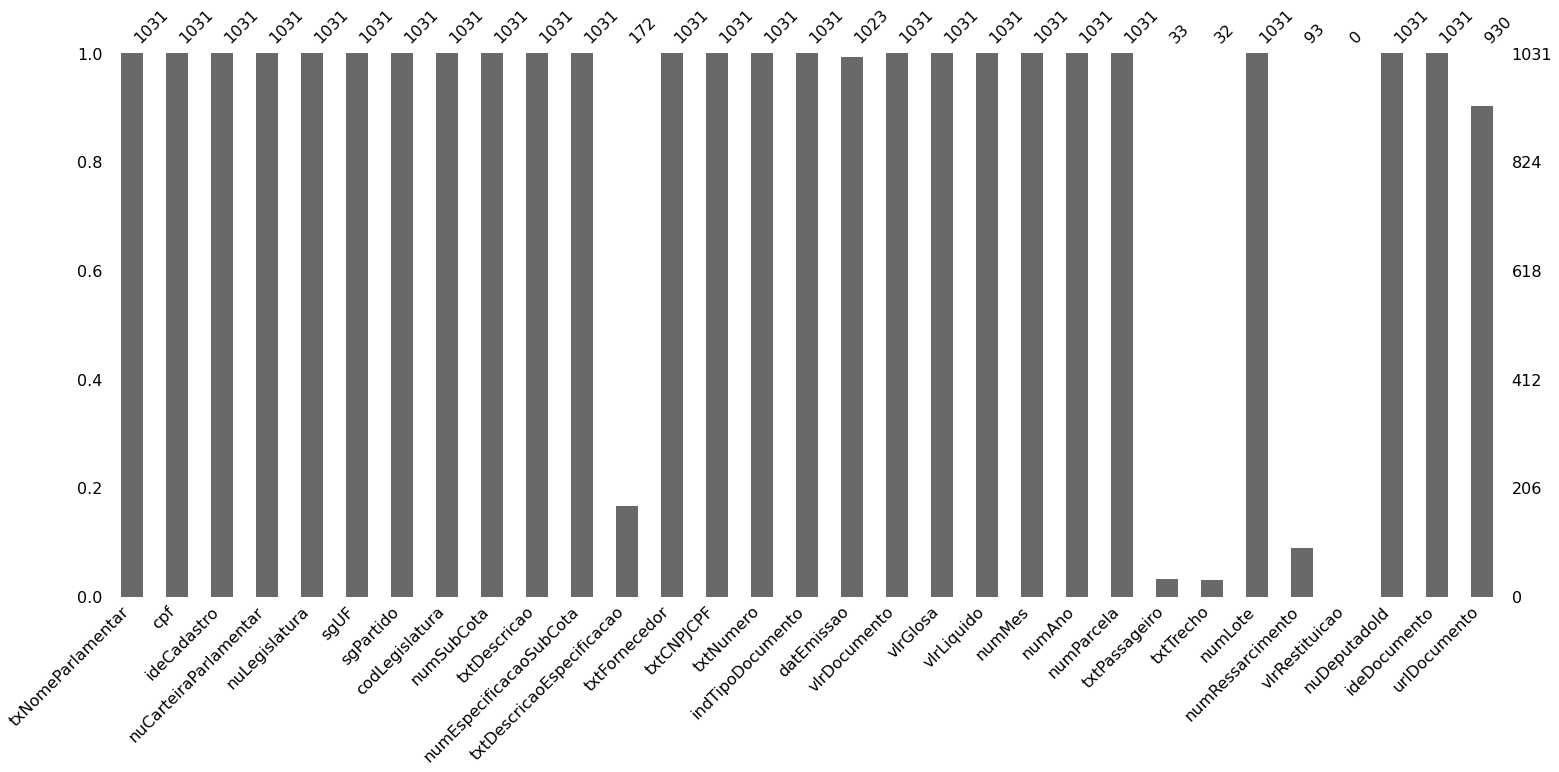

In [25]:
msno.bar(patrus)